In [58]:
## Lib
import cv2
import cv2.aruco as aruco

from matplotlib import pyplot as plt

import numpy as np
from numpy.linalg import norm

import math as m

from HexClass import Hex

## Define IDs
TABLE_TAG_ID = 42
RED_TAG_ID = 47
GREEN_TAG_ID = 13
BLUE_TAG_ID = 36
BACK_TAG_ID = 17

HEX_SIZE = 150
HEX_TAG_SIZE = 50

In [51]:
def findAruco(img, markerSize = 4, totalMarkers = 250) :
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    arucoRequest = getattr(aruco, f'DICT_{markerSize}X{markerSize}_{totalMarkers}')
    arucoDict = aruco.Dictionary_get(arucoRequest)
    arucoParam = aruco.DetectorParameters_create()
    bBoxes, ids, _ = aruco.detectMarkers(grayImg, arucoDict, parameters = arucoParam)

    ids = np.array(ids)
    bBoxes = np.array(bBoxes)

    return ids, bBoxes

In [52]:
def hexBoundaries (hexCenter, scaleFactor, angle = 0) :
    hexCorner = []
    hexSizePixel = HEX_SIZE * scaleFactor / 2

    for i in range(0, 7) :
        xcoord = hexCenter[0] + hexSizePixel * m.cos(angle + i * m.pi/3)
        ycoord = hexCenter[1] - hexSizePixel * m.sin(angle + i * m.pi/3)
        hexCorner.append([xcoord, ycoord])

    return hexCorner

In [53]:
def hexColor (ids) :
    hexColors = []

    for i in range(0, len(ids)) :
        if ids[i] == RED_TAG_ID :
            hexColors.append('#A81800')
        elif ids[i] == GREEN_TAG_ID :
            hexColors.append('#3EB73C')
        elif ids[i] == BLUE_TAG_ID :
            hexColors.append('#1784FF')
        elif ids[i] == BACK_TAG_ID :
            hexColors.append('#BF6A33')
        else :
            hexColors.append('#BFBFBF')

    return hexColors

In [54]:
def hexCenter (bBoxes) :
    hexCenters = []
    bBoxes = np.array(bBoxes)

    for i in range(0, len(bBoxes)) :
        hexCenters.append(np.mean(bBoxes[i, 0], axis = 0))

    return(hexCenters)

In [55]:
def hexAngle (bBoxes) :
    hexAngles = []

    for i in range(0, len(bBoxes)) :
        long = norm(bBoxes[i,0, 1] - bBoxes[i, 0, 2], axis = 0)
        proj = abs(bBoxes[i, 0, 1, 1] - bBoxes[i, 0, 2, 1])
        cosangle = proj / long
        hexAngles.append(np.arccos(cosangle) + m.pi/2)

    return(hexAngles)

    

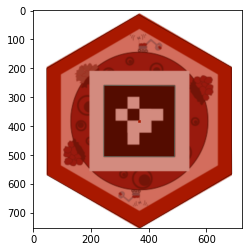

In [59]:
img=cv2.imread("RawData/Sample2.png")

ids, bBoxes = findAruco(img)
#print(bBoxes)
centroid = np.mean(bBoxes[0, 0], axis = 0)
hexColors = hexColor(ids)
hexCenters = hexCenter(bBoxes)


#for i in range(0, len(hexCenters)) :
    
    

img2Display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2Display)

ax = plt.gca()
hex = Hex(bBoxes[0, 0], ids[0]) 
hex.drawArucoBoundaries(ax)
hex.drawBoundaries(ax)
hex.drawCenter()

plt.show()


In [57]:
np.arccos(m.sqrt(2)/2)

0.7853981633974483